In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams["figure.figsize"] = (12, 10)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
file = tf.keras.utils
raw_df = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
)
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
# Statistical analysis

raw_df[
    ["Time", "V1", "V2", "V3", "V4", "V5", "V26", "V27", "V28", "Amount", "Class"]
].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
neg, pos = np.bincount(raw_df["Class"]) # Positive and Negative examples
total = neg + pos # Total number of examples
print(
    f"Examples:\n    Total: {total}\n    Positive: {pos} ({pos / total *100:.2f}% of Total)"
)

Examples:
    Total: 284807
    Positive: 492 (0.17% of Total)


In [14]:
cleaned_df = raw_df.copy()

cleaned_df.pop("Time") # Time is not relevant, it's removed

cleaned_df["Log Amount"] = np.log(cleaned_df.pop("Amount") + 0.001) # Logarithm of the amount

In [17]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2) # Train and test split
train_df, val_df = train_test_split(train_df, test_size=0.2) # Train and validation split using the train set

train_labels = np.array(train_df.pop("Class")) # Numpy array with the label
val_labels = np.array(val_df.pop("Class")) # for every set
test_labels = np.array(test_df.pop("Class"))
bool_train_labels = train_labels != 0 # Boolean array

train_features = np.array(train_df) # Array with features, which are all the columns except the class
val_features = np.array(val_df)
test_features = np.array(test_df)

In [20]:
print(f"Average class probability in the train set: {train_labels.mean():.4f}")
print(f"Average class probability in the test set: {test_labels.mean():.4f}")
print(f"Average class probability in the validation set: {val_labels.mean():.4f}") # The results are reasonable taking into account the original distribution

Average class probability in the train set: 0.0017
Average class probability in the test set: 0.0018
Average class probability in the validation set: 0.0016


In [22]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features) # Scaler fit only on the training set

val_features = scaler.transform(val_features) # Transform for the other sets
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5) # This avoids outliers, shrinking them between the range
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

# Labels
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

# Features
print("Training features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


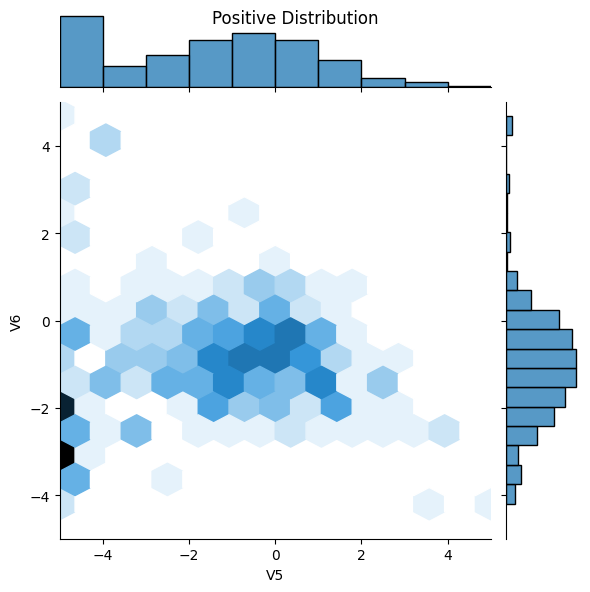

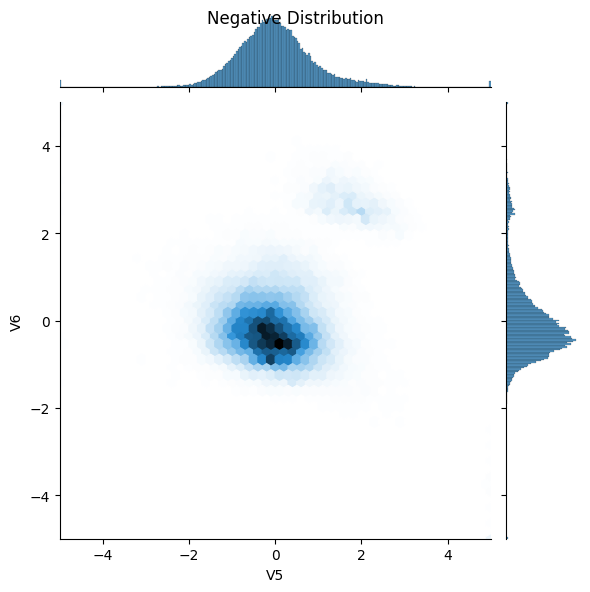

In [31]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle('Positive Distribution')

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle('Negative Distribution')

The positive examples contain much higher rate of extreme values

In [ ]:
METRICS = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'), # Loss function
    keras.metrics.MeanSquaredError(name='Brier score'), # Mean squared error between the predicted probability and the actual label
    keras.metrics.TruePositives(name='tp'), # Correctly predicted positive examples
    keras.metrics.FalsePositives(name='fp'), # Error type I - Predicted positive but actually negative
    keras.metrics.TrueNegatives(name='tn'), # Correctly predicted negative examples
    keras.metrics.FalseNegatives(name='fn'), # Error type II - Predicted negative but actually positive
    keras.metrics.BinaryAccuracy(name='accuracy'), # TN + TP / total
    keras.metrics.Precision(name='precision'), # TP / (TP + FP)
    keras.metrics.Recall(name='recall'), # TP / (TP + FN)
    keras.metrics.AUC(name='auc'), # Area Under the Curve of the Receiver Operating Characteristic (ROC) curve
    keras.metrics.AUC(name='prc', curve='PR') # Precision-Recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', 
                           input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics
    )

    return model